# SOFTMAX

In [1]:
import tensorflow 
tf = tensorflow.compat.v1
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Rutas de los archivos locales de MNIST
train_images_path = 'MNIST_data/train-images-idx3-ubyte.gz'
train_labels_path = 'MNIST_data/train-labels-idx1-ubyte.gz'
test_images_path = 'MNIST_data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'MNIST_data/t10k-labels-idx1-ubyte.gz'

# Cargar los datos de entrenamiento y prueba
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

# Normalizar los datos de las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verificar la forma de los datos cargados
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
single_image = train_images[1]

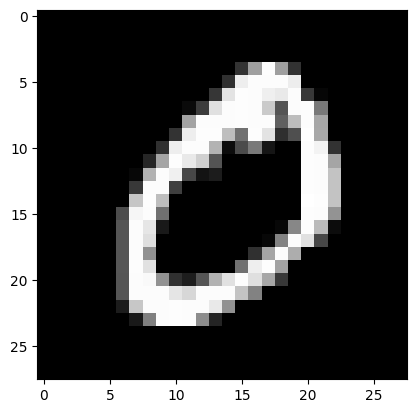

In [5]:
plt.imshow(single_image,cmap='gist_gray')

In [6]:
single_image.min()

0.0

In [7]:
single_image.max()

1.0

In [8]:
# PLACEHOLDERS 
tf.disable_eager_execution()
x = tf.placeholder(tf.float32,shape=[None,784])

In [9]:
# VARIABLES 
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))


In [10]:
#CREATE A GRAPH OPERATIONS 
y = tf.matmul(x,W) + b

In [11]:
#LOSS FUNCTION 
y_true = tf.placeholder(tf.float32,[None,10])

In [12]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
#OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [14]:
# CREATE SESSION 
init = tf.global_variables_initializer()

In [15]:
def next_batch(images, labels, batch_size):
    # Obtener el número total de ejemplos
    num_examples = images.shape[0]
    # Generar índices aleatorios para el batch
    indices = np.random.choice(num_examples, batch_size)
    # Obtener el batch de imágenes y etiquetas correspondientes
    batch_x = images[indices]
    batch_y = labels[indices]
    return batch_x, batch_y

In [16]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        
        batch_x, batch_y = next_batch(train_images, train_labels, 100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})

2024-02-24 15:08:55.023674: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


ValueError: Cannot feed value of shape (100, 28, 28) for Tensor Placeholder:0, which has shape (?, 784)